# PBL_II

# Cyberbullying Classification using NLP

#### SIDDHARTH INGLE_____ 20070122131
#### SOUMYAROOP DAS______ 20070122138
#### SREEMAN REPAKA______ 20070122139
#### ANINDITA MUKHERJEE__ 20070122 

#### This notebook contains the code for the EDA (Exploratory Data Analysis) and Data Preprocessing phase of the project mentioned above

## Code Outline

#### 1.Prerequisite processes (Loading of dataset,checking dimensions of the dataset,removal of duplicates,etc.)
#### 2.Text Cleaning
#### 3.BERT Tokenization
#### 4.Data Visualization

## .
## .
## .
## .

### I. Prerequisite Processes

### Loading in Python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import spacy
import re
import nltk
import string
import sklearn
import tensorflow as tf
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report



In [ ]:
#!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Loading in the Dataset

In [ ]:
rd=pd.read_csv("/content/cyberbullying_tweets.csv",encoding='latin1')

In [ ]:
rd

,tweet_text,type
0,"In other words #katandandre, your food was cra...",none
1,Why is #aussietv so white? #MKR #theblock #ImA...,none
2,@XochitlSuckkks a classy whore? Or more red ve...,none
3,"@Jason_Gio meh. :P thanks for the heads up, b...",none
4,@RudhoeEnglish This is an ISIS account pretend...,none
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",racism
47688,Turner did not withhold his disappointment. Tu...,racism
47689,I swear to God. This dumb nigger bitch. I have...,racism
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,racism


In [ ]:
rd.groupby('type').head(2).reset_index(drop=True)

,tweet_text,type
0,"In other words #katandandre, your food was cra...",none
1,Why is #aussietv so white? #MKR #theblock #ImA...,none
2,rape is real..zvasiyana nema jokes about being...,sexism
3,You never saw any celebrity say anything like ...,sexism
4,"Sudeep, did she invite him though? No right? W...",religion
5,@discerningmumin Islam has never been a resist...,religion
6,"@ikralla fyi, it looks like I was caught by it...",other
7,I need to just switch to an organization-based...,other
8,Here at home. Neighbors pick on my family and ...,age
9,Being bullied at school: High-achieving boys u...,age


In [ ]:
rd.head

<bound method NDFrame.head of                                               tweet_text    type
0      In other words #katandandre, your food was cra...    none
1      Why is #aussietv so white? #MKR #theblock #ImA...    none
2      @XochitlSuckkks a classy whore? Or more red ve...    none
3      @Jason_Gio meh. :P  thanks for the heads up, b...    none
4      @RudhoeEnglish This is an ISIS account pretend...    none
...                                                  ...     ...
47687  Black ppl aren't expected to do anything, depe...  racism
47688  Turner did not withhold his disappointment. Tu...  racism
47689  I swear to God. This dumb nigger bitch. I have...  racism
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...  racism
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...  racism

[47692 rows x 2 columns]>

In [ ]:
rd.describe()

,tweet_text,type
count,47692,47692
unique,46004,6
top,#NAME?,religion
freq,14,7998


In [ ]:
rd.shape

(47692, 2)

#### Checking for Duplicated Tweets

In [ ]:
rd.duplicated("tweet_text").sum()

1688

#### Removing Duplicated Tweets

In [ ]:
rd.drop_duplicates("tweet_text", inplace=True)

In [ ]:
rd.duplicated("tweet_text").sum()

0

# .
# .
# .

### II. Cleaning the Text

#### The texts in the dataset is in the form of human language, it needs to be cleaned/formatted so that it can be processed by the NLP model

#### The processes given below need to be conducted to get the preprocessed state of the data:
##### 1. Removal of 'Twitter characters' (mentions, hashtags, emojis)
##### 2. Removal of stopwords (the, is, can, be, I, etc.)
##### 3. Removal of Special Characters (unicode,* )
##### 4. Removal of Punctuations and normalization of texts
##### 5. Removal of Newline
##### 6. Removal of HTML characters
##### 7. Removal of consecutive whitespaces
##### 8. Removal of tweets less than 5 words
##### 9. Removal of tweets less more than 100 words

## .
## .

### 1. Removal of 'Twitter characters' (mentions, hashtags, emojis)

In [ ]:
import preprocessor as p

In [ ]:
def preprocess_tweet(row):
    text = row['tweet_text']
    text = p.clean(text)
    return text

In [ ]:
rd.head(20)

,tweet_text,type
0,"In other words #katandandre, your food was cra...",none
1,Why is #aussietv so white? #MKR #theblock #ImA...,none
2,@XochitlSuckkks a classy whore? Or more red ve...,none
3,"@Jason_Gio meh. :P thanks for the heads up, b...",none
4,@RudhoeEnglish This is an ISIS account pretend...,none
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",none
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,none
7,Karma. I hope it bites Kat on the butt. She is...,none
8,@stockputout everything but mostly my priest,none
9,Rebecca Black Drops Out of School Due to Bully...,none


In [ ]:
rd['tweet_text'] = rd.apply(preprocess_tweet, axis=1)

##### As we can see all the hashtags, mentions, etc., are removed

In [ ]:
rd.head(10)

,tweet_text,type
0,"In other words , your food was crapilicious!",none
1,Why is so white?,none
2,a classy whore? Or more red velvet cupcakes?,none
3,"meh. thanks for the heads up, but not too conc...",none
4,This is an ISIS account pretending to be a Kur...,none
5,"Yes, the test of god is that good or bad or in...",none
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,none
7,Karma. I hope it bites Kat on the butt. She is...,none
8,everything but mostly my priest,none
9,Rebecca Black Drops Out of School Due to Bully...,none


### 2. Removal of stopwords (the, is, can, be, I, etc.)

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
def stopword_removal(row):
    text = row['tweet_text']
    text = remove_stopwords(text)
    return text

In [ ]:
rd['tweet_text'] = rd.apply(stopword_removal, axis=1)

##### As you can see common english words such as 'the','as','can','be','which','was',etc. have been removed from the dataframe

##### The main reason to do this is to remove all the words that do not add any value to the tweets/text.

In [ ]:
rd.head(20)

,tweet_text,type
0,"In words , food crapilicious!",none
1,Why white?,none
2,classy whore? Or red velvet cupcakes?,none
3,"meh. thanks heads up, concerned angry dude twi...",none
4,This ISIS account pretending Kurdish account. ...,none
5,"Yes, test god good bad indifferent weird whate...",none
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,none
7,Karma. I hope bites Kat butt. She nasty.,none
8,priest,none
9,Rebecca Black Drops Out School Due Bullying:,none


### 3.Removal of Special Characters

In [ ]:
def spec_char_removal(row):
    text = row['tweet_text']
    text = re.sub('[^a-zA-Z]',' ',text)  
    return text

In [ ]:
rd.head(20)

,tweet_text,type
0,"In words , food crapilicious!",none
1,Why white?,none
2,classy whore? Or red velvet cupcakes?,none
3,"meh. thanks heads up, concerned angry dude twi...",none
4,This ISIS account pretending Kurdish account. ...,none
5,"Yes, test god good bad indifferent weird whate...",none
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,none
7,Karma. I hope bites Kat butt. She nasty.,none
8,priest,none
9,Rebecca Black Drops Out School Due Bullying:,none


### 4.Removal of Punctuations and normalization of texts

In [ ]:
rd['tweet_text'] = rd['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

<ipython-input-30-2a20b82c1c11>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rd['tweet_text'] = rd['tweet_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


In [ ]:
rd.head(20)

,tweet_text,type
0,in words food crapilicious,none
1,why white,none
2,classy whore or red velvet cupcakes,none
3,meh thanks heads up concerned angry dude twitter,none
4,this isis account pretending kurdish account l...,none
5,yes test god good bad indifferent weird whatev...,none
6,itu sekolah ya bukan tempat bully ga jauh kaya...,none
7,karma i hope bites kat butt she nasty,none
8,priest,none
9,rebecca black drops out school due bullying,none


### 5.Removal of Newlines

In [ ]:
def spec_char_removal(row):
    text = row['tweet_text']
    text = re.sub("\n"," ",text) 
    return text

In [ ]:
rd.head(20)

,tweet_text,type
0,in words food crapilicious,none
1,why white,none
2,classy whore or red velvet cupcakes,none
3,meh thanks heads up concerned angry dude twitter,none
4,this isis account pretending kurdish account l...,none
5,yes test god good bad indifferent weird whatev...,none
6,itu sekolah ya bukan tempat bully ga jauh kaya...,none
7,karma i hope bites kat butt she nasty,none
8,priest,none
9,rebecca black drops out school due bullying,none


### 6.Removal of HTML Characters

In [ ]:
def html_char_removal(row):
    text = row['tweet_text']
    text=re.sub('<.*?>', ' ', text) 
    return text

In [ ]:
rd.head(20)

,tweet_text,type
0,in words food crapilicious,none
1,why white,none
2,classy whore or red velvet cupcakes,none
3,meh thanks heads up concerned angry dude twitter,none
4,this isis account pretending kurdish account l...,none
5,yes test god good bad indifferent weird whatev...,none
6,itu sekolah ya bukan tempat bully ga jauh kaya...,none
7,karma i hope bites kat butt she nasty,none
8,priest,none
9,rebecca black drops out school due bullying,none


### 7.Removal of consecutive Whitespaces

In [ ]:
def cons_space_removal(text):
    text= row["tweet_text"]
    tex=re.sub("\s\s+" , " ", text)
    return text

In [ ]:
rd.head(20)

,tweet_text,type
0,in words food crapilicious,none
1,why white,none
2,classy whore or red velvet cupcakes,none
3,meh thanks heads up concerned angry dude twitter,none
4,this isis account pretending kurdish account l...,none
5,yes test god good bad indifferent weird whatev...,none
6,itu sekolah ya bukan tempat bully ga jauh kaya...,none
7,karma i hope bites kat butt she nasty,none
8,priest,none
9,rebecca black drops out school due bullying,none


In [ ]:
rd.duplicated("tweet_text").sum()

1207

In [ ]:
rd.drop_duplicates("tweet_text", inplace=True)

In [ ]:
rd.duplicated("tweet_text").sum()

0

In [ ]:
rd.shape

(44797, 2)

In [ ]:
rd.type.value_counts()

religion    7950
age         7918
racism      7794
none        7676
sexism      7596
other       5863
Name: type, dtype: int64

#### Removing the category of 'other' in the 'type' attribute

In [ ]:
rd=rd[rd["type"]!="other"]

In [ ]:
rd.type.value_counts()

religion    7950
age         7918
racism      7794
none        7676
sexism      7596
Name: type, dtype: int64

In [ ]:
rd.shape

(38934, 2)

## .
## .
## .
## .

#### Making a separate column in the dataframe, indicating the number of words in each tweet

In [ ]:
text_len=[]

for text in rd.tweet_text:
    tweet_len=len(text.split())
    text_len.append(tweet_len)

In [ ]:
rd['text_len']=text_len

<ipython-input-47-d3460e6aaabb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd['text_len']=text_len


In [ ]:
rd['text_len'] = rd['text_len'].astype('float')

<ipython-input-48-5e4d1c7f830c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd['text_len'] = rd['text_len'].astype('float')


In [ ]:
rd.head(10)

,tweet_text,type,text_len
0,in words food crapilicious,none,4.0
1,why white,none,2.0
2,classy whore or red velvet cupcakes,none,6.0
3,meh thanks heads up concerned angry dude twitter,none,8.0
4,this isis account pretending kurdish account l...,none,9.0
5,yes test god good bad indifferent weird whatev...,none,11.0
6,itu sekolah ya bukan tempat bully ga jauh kaya...,none,10.0
7,karma i hope bites kat butt she nasty,none,8.0
8,priest,none,1.0
9,rebecca black drops out school due bullying,none,7.0


In [ ]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38934 entries, 0 to 47691
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_text  38934 non-null  object 
 1   type        38934 non-null  object 
 2   text_len    38934 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
#rd.to_csv("EDA_1.csv")

In [ ]:
x=rd['text_len'].values

<ipython-input-53-eed8c7dc51b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


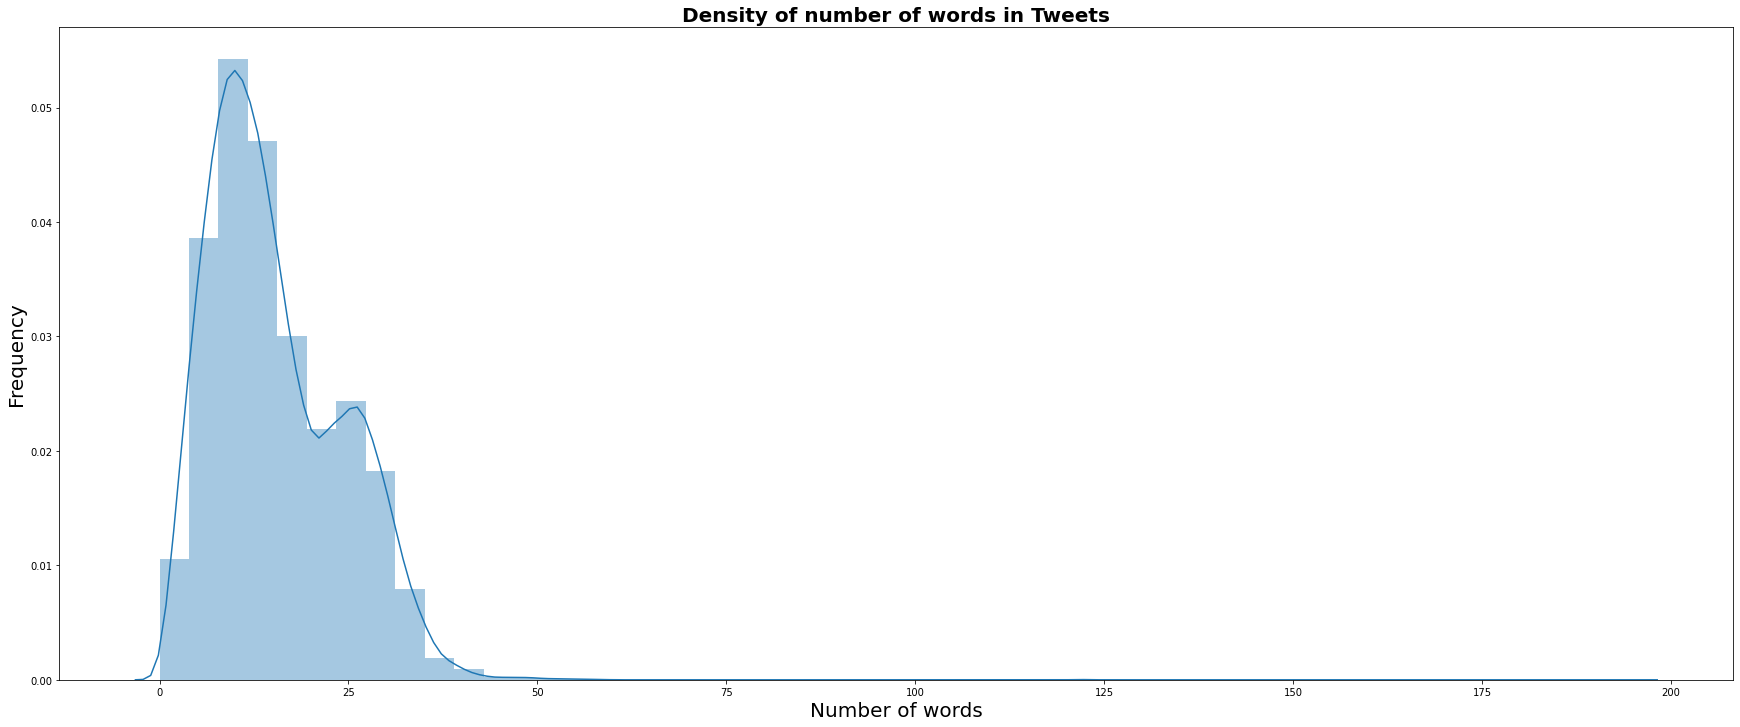

In [ ]:
plt.figure(figsize=(30,12))
sns.distplot(x)

plt.title('Density of number of words in Tweets', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Number of words', fontdict={'fontsize':20})
plt.ylabel('Frequency', fontdict={'fontsize':20})
plt.show()

<Axes: xlabel='type'>

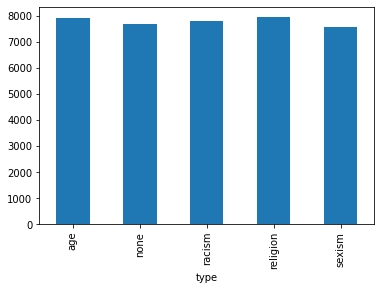

In [ ]:
rd.groupby(['type']).size().plot.bar()

### Word Cloud

Sexism


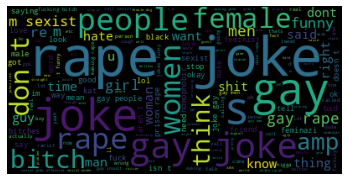

Racism


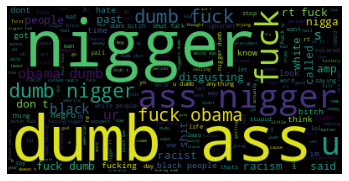

Age


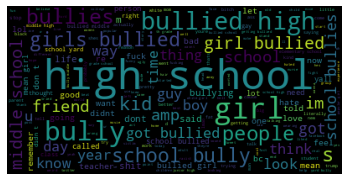

Religion


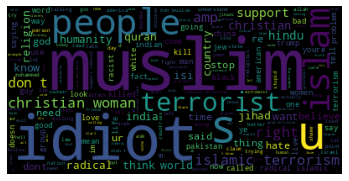

None


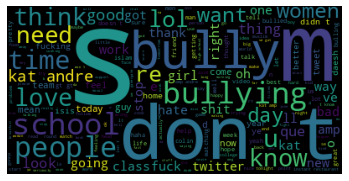

In [ ]:
print("Sexism")
text = " ".join(review for review in rd[rd.type=='sexism'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Racism")
text = " ".join(review for review in rd[rd.type=='racism'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Age")
text = " ".join(review for review in rd[rd.type=='age'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("Religion")
text = " ".join(review for review in rd[rd.type=='religion'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print("None")
text = " ".join(review for review in rd[rd.type=='none'].tweet_text.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### WordCount

In [ ]:
word_freq=Counter(" ".join(rd["tweet_text"]).split()).most_common(30)

In [ ]:
word_freq

[('i', 17368),
 ('school', 8712),
 ('t', 6096),
 ('s', 5992),
 ('fuck', 5597),
 ('like', 5410),
 ('you', 5324),
 ('dumb', 5216),
 ('high', 5171),
 ('bullied', 4461),
 ('people', 4408),
 ('nigger', 4284),
 ('rape', 4225),
 ('u', 4148),
 ('it', 4093),
 ('gay', 3967),
 ('jokes', 3447),
 ('the', 3144),
 ('bully', 3131),
 ('girls', 2778),
 ('black', 2720),
 ('girl', 2710),
 ('amp', 2610),
 ('ass', 2596),
 ('muslims', 2478),
 ('muslim', 2452),
 ('don', 2334),
 ('m', 2210),
 ('white', 2159),
 ('know', 2071)]

### 8. Removal of tweets less than 10 words

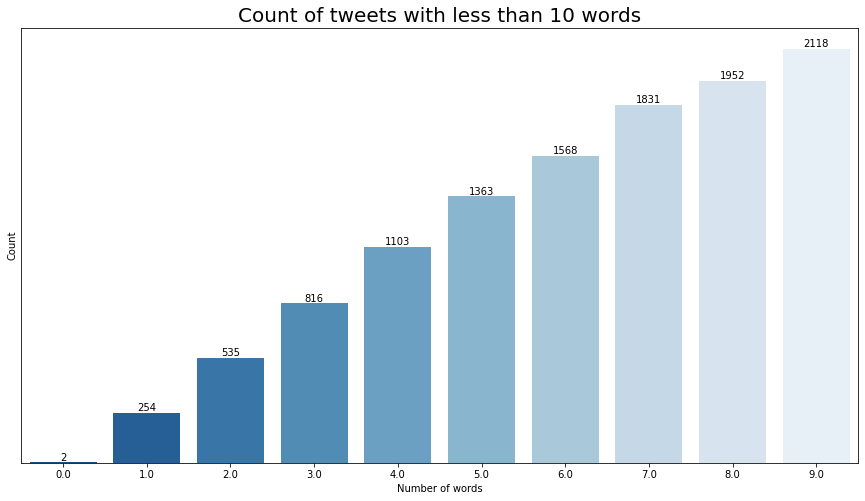

In [ ]:
plt.figure(figsize=(15,8))
ax1=sns.countplot(x='text_len', data= rd[rd['text_len']<10], palette='Blues_r')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
plt.ylabel('Count')
plt.xlabel('Number of words')
plt.show()

In [ ]:
rd=rd[rd['text_len']>3]

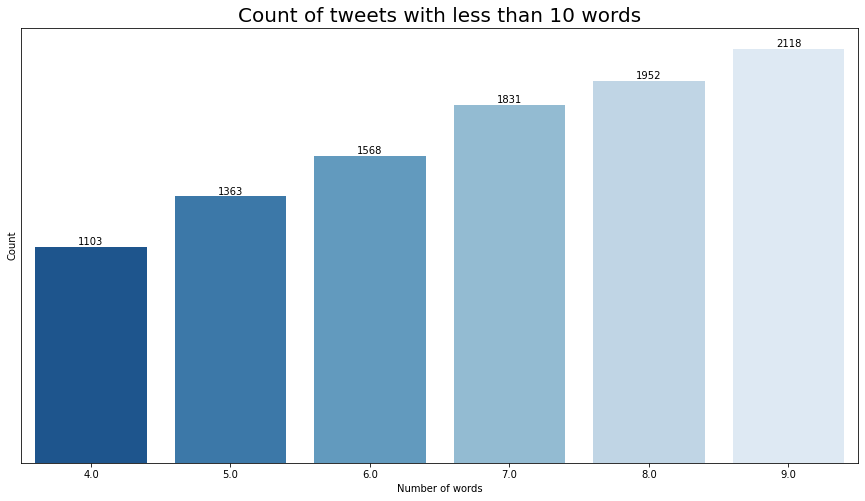

In [ ]:
plt.figure(figsize=(15,8))
ax1=sns.countplot(x='text_len', data= rd[rd['text_len']<10], palette='Blues_r')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
plt.ylabel('Count')
plt.xlabel('Number of words')
plt.show()

### 9. Removal of tweets more than 100 words

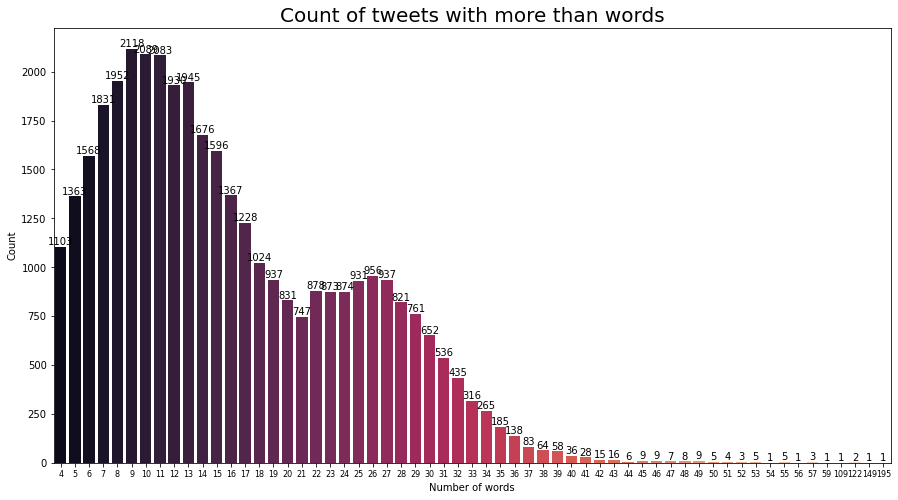

In [ ]:
plt.figure(figsize=(15,8))
ax1=sns.countplot(x=rd['text_len'].astype(int), data=rd[(rd['text_len']<=1000) & (rd['text_len']>10)], palette='rocket')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.title('Count of tweets with more than words', fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Count')
plt.xlabel('Number of words')
plt.show()

In [ ]:
rd=rd[rd['text_len']<100]

In [ ]:
rd=rd.drop(['text_len'], axis=1)

### Saving the Dataset

In [ ]:
rd.to_csv("EDA_PP_F.csv")

# Baseline models training




# BERT Finetuning

BERT is a pretrained NLP model developed by google for sentiment analysis. We need to finetune BERT for it to work on our dataset.

In [ ]:
# data_train, data_test = train_test_split(rd, test_size = 0.3, random_state = 42, shuffle = True, stratify = rd.type)


In [ ]:
# data_train  = data_train[:12000]
# data_train.shape

In [ ]:
# data_test = data_test[:500]
# data_test.shape

In [ ]:
# label_enc = LabelEncoder()

In [ ]:
# data_train['type'] = label_enc.fit_transform(data_train['type'])
# data_train.head()

In [ ]:
# data_test['type'] = label_enc.transform(data_test['type'])

In [ ]:
# !pip install transformers